In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


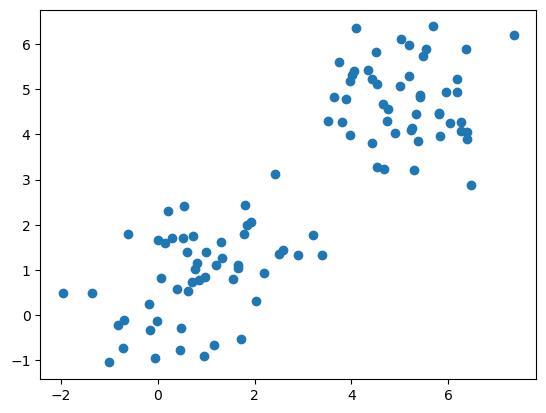

In [190]:
class_0 = np.random.randn(50, 2) + [1, 1]
class_1 = np.random.randn(50, 2) + [5, 5]
dataset = np.vstack((class_0, class_1))
plt.scatter(dataset[:, 0], dataset[:, 1])

In [191]:
k = 2
c_a = dataset[0]
c_b = dataset[dataset.shape[0] - 1]
centroids = np.vstack([c_a, c_b])
mappings = np.zeros(dataset.shape[0])

In [192]:
train(mappings, centroids, dataset)

[[0.85705742 0.89672282]
 [5.11902477 4.75548647]]


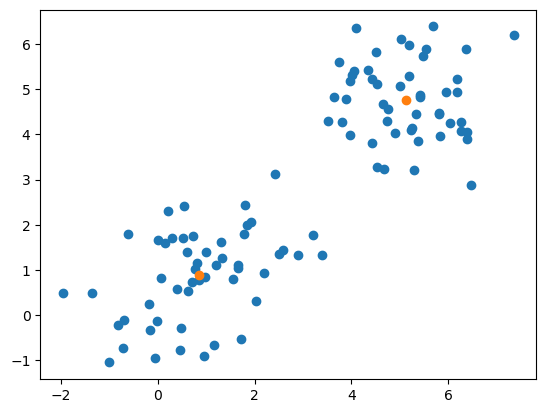

In [193]:
print(centroids)
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1])

In [194]:
def calc_centers(cluster_map, centroids, dataset):
    new_centroids = centroids
    for key in range(centroids.shape[0]):
        cluster = dataset[cluster_map == key]
        n = cluster.shape[0]
        if (n > 0):
            new_centroids[key] = np.mean(cluster, axis = 0)
    centroids[:] = new_centroids

In [195]:
def assign_centroids(map, centroids, dataset):
    for idx, row in enumerate(dataset):
        minimum = 10000
        center = 10000
        for idxa, centroid in enumerate(centroids):
            dist = np.sum(np.square(row - centroid))
            if (dist < minimum):
                minimum = dist
                center = idxa
        map[idx] = center

In [196]:
def train(map, centroids, dataset):
    iteration = 100
    for a in range(iteration):
        assign_centroids(map, centroids, dataset)
        calc_centers(map, centroids, dataset)
    print("")